<center>
    <h1>Logistic Regression Assignment</h1>
</center>

---
## **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Pre Profiling Report**](#Section44)

**5.** [**Data Pre-processing**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>

**9.** [**Conclusion**](#Section9)<br>

<a id = Section1></a>

---
# **1. About the Dataset**

---
**Pumpkin seeds** are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality types of pumpkin seeds, `Urgup_Sivrisi` and `Cercevelik`, generally grown in Urgup and Karacaoren regions in Turkey.
- The classification goal is to predict to which variety a seed belongs making ***Class*** our target variable

- Morphological measurements of **2500** pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques.





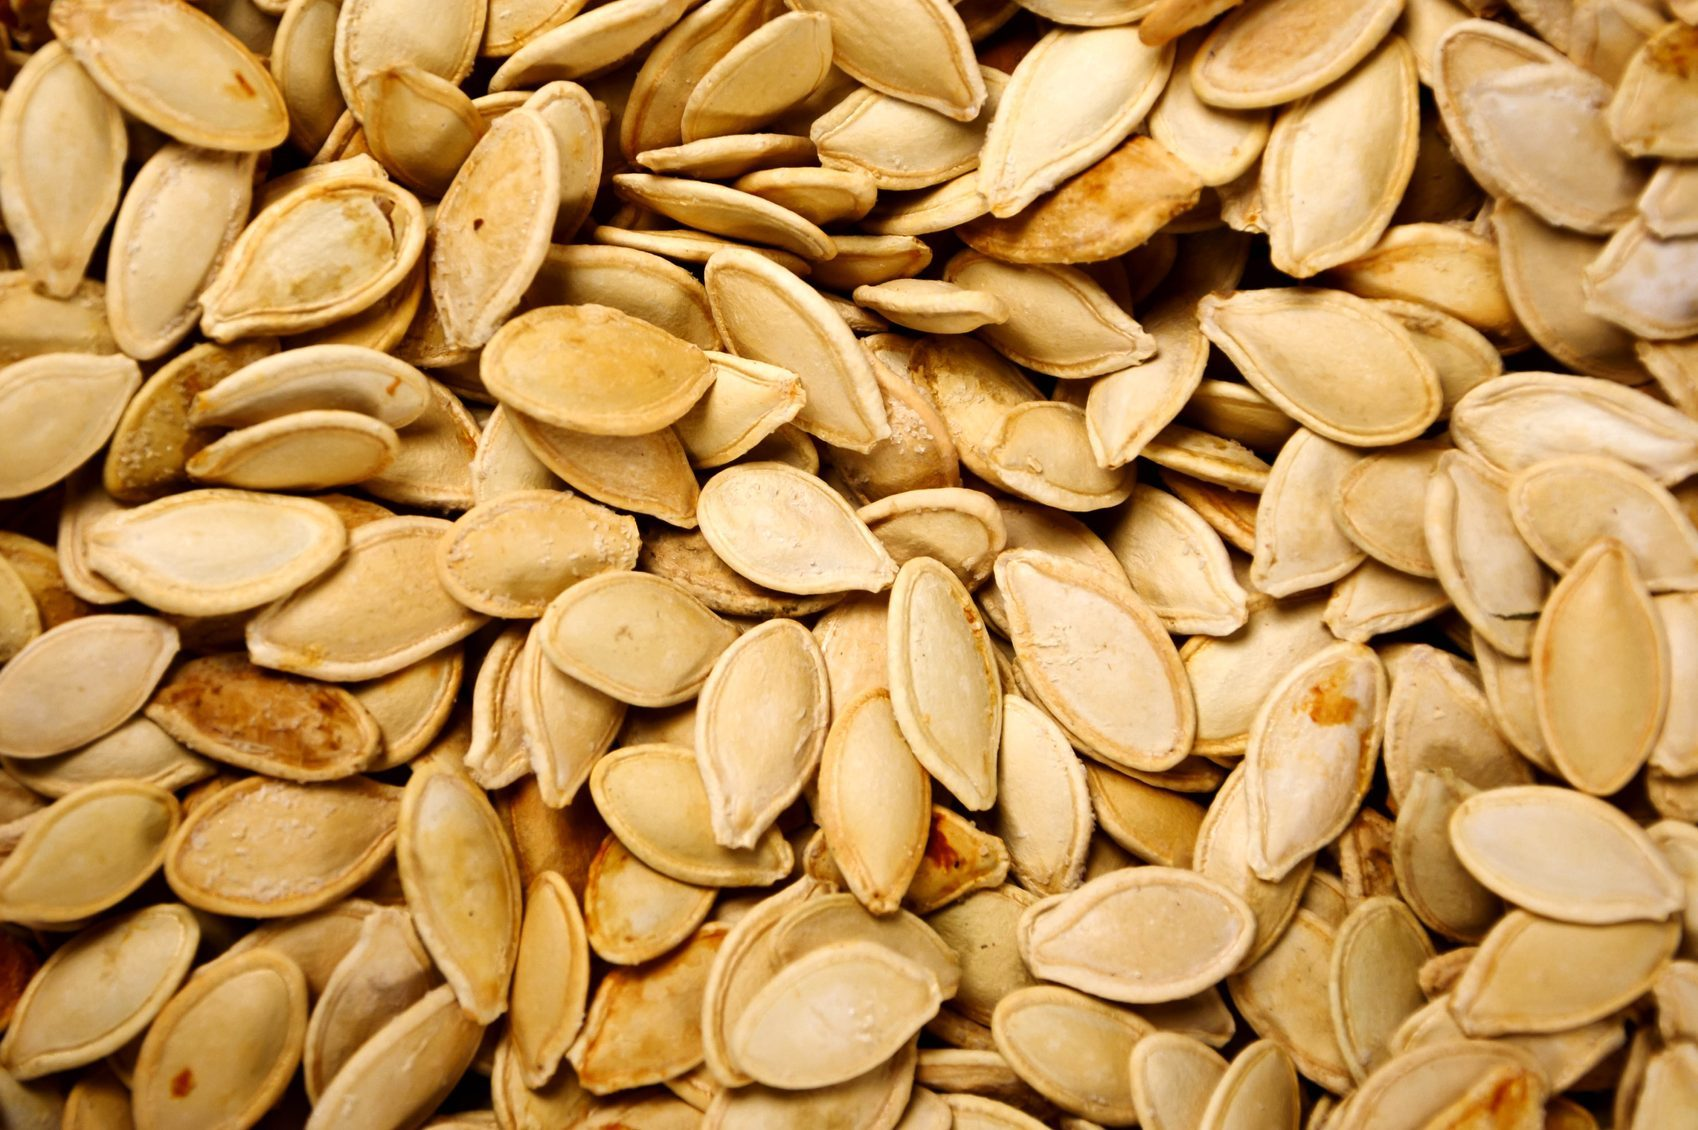

<a id = Section2></a>

---
# **2. Problem Statement**
---

- The classification goal is to predict to which variety a seed belongs making `Class` our target variable.
- `Urgup_Sivrisi` and `Cercevelik` are the two types of seeds which have 12 features making them distinct.

<a id = Section3></a>

---
# **3. Installing and importing libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q ydata-profiling               # Toolbox for Generating Statistics Report
!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance
!pip install -q missingno                     # To find the pattern of missingness in the dataset

<a id = Section32></a>
### **3.2 Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade ydata-profiling
!pip install -q --upgrade yellowbrick

<a id = Section33></a>
### **3.3 Importing Libraries**

In [1]:
# For Panel Data Analysis
import pandas as pd
import numpy as np
import re
import missingno as msno

from ydata_profiling import ProfileReport

# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

# For Preprocessing
import sklearn as sk

# For Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# For metrics evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

<a id = Section4></a>

---
# **4. Data Acquisition and Description**
---

- This data is based on the various features that are present in the **seeds** and the **classification** of them based on it.
- The description of the data is as follows:

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 2500 | 13 | 296 KB |



| Id | Features | Description |
| :-- | :--| :--|
|01| **Area** | Surface area of seeds |
|02| **Perimeter** | Perimeter of seeds
|03| **Major_Axis_Length** | Length of seed|
|04| **Minor_Axis_Length** | Length of seed |
|05| **Convex_Area** | Convex Area |
|06| **Equiv_Diameter** | Diameter of seed |
|07| **Eccentricity** | Eccentricity of seed
|08| **Solidity** | Solidity of seed |
|09| **Extent** | Span of seed |
|10| **Roundness** | Roundness of seed
|11| **Aspect_Ration** | Aspect of seed |
|12| **Compactness** | Compactness of seed |
|13| **Class** | To which class the seed belongs|


In [2]:
seed_data = pd.read_csv('Pumpkin_Seeds_Dataset.csv')
print(f"Data Shape: {seed_data.shape}")

Data Shape: (2500, 13)


**Examine first 5 rows of the data**

In [3]:
seed_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
print(f"Described Column Length: {len(seed_data.describe().columns)}")

Described Column Length: 12


In [5]:
seed_data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


**Observations:**
- There are **no** **missing values** in the dataset.
- There are **no duplicate rows**

<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
seed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


**Observations:**
- There are **13 features**, out of which **10 are float**, **2 are integer values** and **1 is object type values**, which is our target variable.


<a id = Section44></a>
### **4.3 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [10]:
profile = ProfileReport(seed_data)
profile.to_file(output_file="Pre_Profiling_Report_on_Pumpkin_Seeds_Dataset.html")
print('Pre-Profiling Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Profiling Accomplished!


In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

<a id = Section5></a>
# **5. Data Pre-Processing**

---
**<h4>Question 1:** Create a function that returns the dataframe displaying the null value counts and their percentage using pandas isnull function.</h4>

---

<details>

**<summary>Hint:</summary>**

- You first have to create a dataframe where the index is name of the columns `null_frame = pd.DataFrame(index = df.columns.values)`

- Then you create a column **Null Frequency** that would contain the sum of the null values which you can do using `null_frame['Null Frequency'] = df.isnull().sum().values`

- Once you are done with this step then you calculate the percentage of Missing values using `percent = df.isnull().sum().values/df.shape[0]`

- Then you create a new column in the same dataframe using the code `null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100`

- Once, you have the columns you can simply return the transpose of the dataframe using `null_frame.transpose()`

</details>

In [11]:
def null_data(df):
  null_frame = pd.DataFrame(index = df.columns.values)
  null_frame['Null Frequency'] = df.isnull().sum().values
  percent = df.isnull().sum().values/df.shape[0]
  null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
  return null_frame.transpose()

In [12]:
null_data(seed_data)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* This makes it evident that we have no misisng data

---
**<h4>Question 2:** Create a function that identifies the zero data and display that information in a dataframe.</h4>

---

<details>

**<summary>Hint:</summary>**

- You first have to create a dataframe where the index is name of the columns `zero_frame = pd.DataFrame(index = df.columns.values)`

- Then you create a column **Zero Frequency** that would contain the sum of the Zero values which you can do using `zero_frame['Zero Frequency'] = df[df == 0].count().values`

- Once you are done with this step then you calculate the percentage of Zero values using `percent = df[df == 0].count().values / df.shape[0]`

- Then you create a new column in the same dataframe using the code `zero_frame['Zero %age'] = np.round(percent, decimals = 4) * 100`

- Once, you have the columns you can simply return the transpose of the dataframe using `zero_frame.transpose()`

</details>

In [13]:
def find_zero(df):
  zero_frame = pd.DataFrame(index = df.columns.values)
  zero_frame['Zero Frequency'] = df[df == 0].count().values
  percent = df[df == 0].count().values / df.shape[0]
  zero_frame['Zero %age'] = np.round(percent, decimals = 4) * 100
  return zero_frame.transpose()

In [14]:
find_zero(seed_data)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Zero Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- This makes it evident that we have no missing or irrelevant zero data

---
**<h4>Question 3:** Create a function that tells you if there are any redundant records in the dataframe or not and also tell you the count of the duplicated records.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `df.duplicated().any()` to find if there are any duplicated records in the dataframe.

- Using `df.duplicated().sum()` will tell you the count of duplicated records if there are any duplicated records.
</details>

In [15]:
def duplicate_count(df):
  print(f'Contains Redundant Records:', df.duplicated().any())
  print('Duplicate Count:', df.duplicated().sum())

In [16]:
duplicate_count(seed_data)

Contains Redundant Records: False
Duplicate Count: 0


- This makes it evident that we have no redundancy in data

<a id = Section55></a>
### **5.1 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [19]:
from ydata_profiling import ProfileReport
profile = ProfileReport(seed_data)
profile.to_file(output_file="Post_Profiling_Report_on_Pumpkin_Seeds_Dataset.html")
print('Post-Profiling Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Post-Profiling Accomplished!


In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

<a id = Section6></a>
# **6. Exploratory Data Analysis**

---
**<h4>Question 4:** Create a function to get the frequency distribution of the numerical features in the dataset? </h4>

---

<details>

**<summary>Hint:</summary>**

- First we drop the column `Class` mentioning the axis as 1 and calling the hist function in Pandas with the help of code `df.drop('Class',axis=1).hist(figsize=(12,7))`

- Then we go ahead and name the chart a title with the help of `plt.suptitle("Features histograms", fontsize=16)`.

- Then we tighten the layout using `plt.tight_layout()` then we sets the top margin of the subplots to 0.9 using `plt.subplots_adjust(top=0.9)` and then we display the figure using `plt.show()`.

In [7]:
seed_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [10]:
def plot_hist(df):
  df.drop('Class',axis=1).hist(figsize=(22,22))
  plt.suptitle("Features histograms", fontsize=16)
  plt.tight_layout()
  plt.subplots_adjust(top=0.9)
  plt.show()

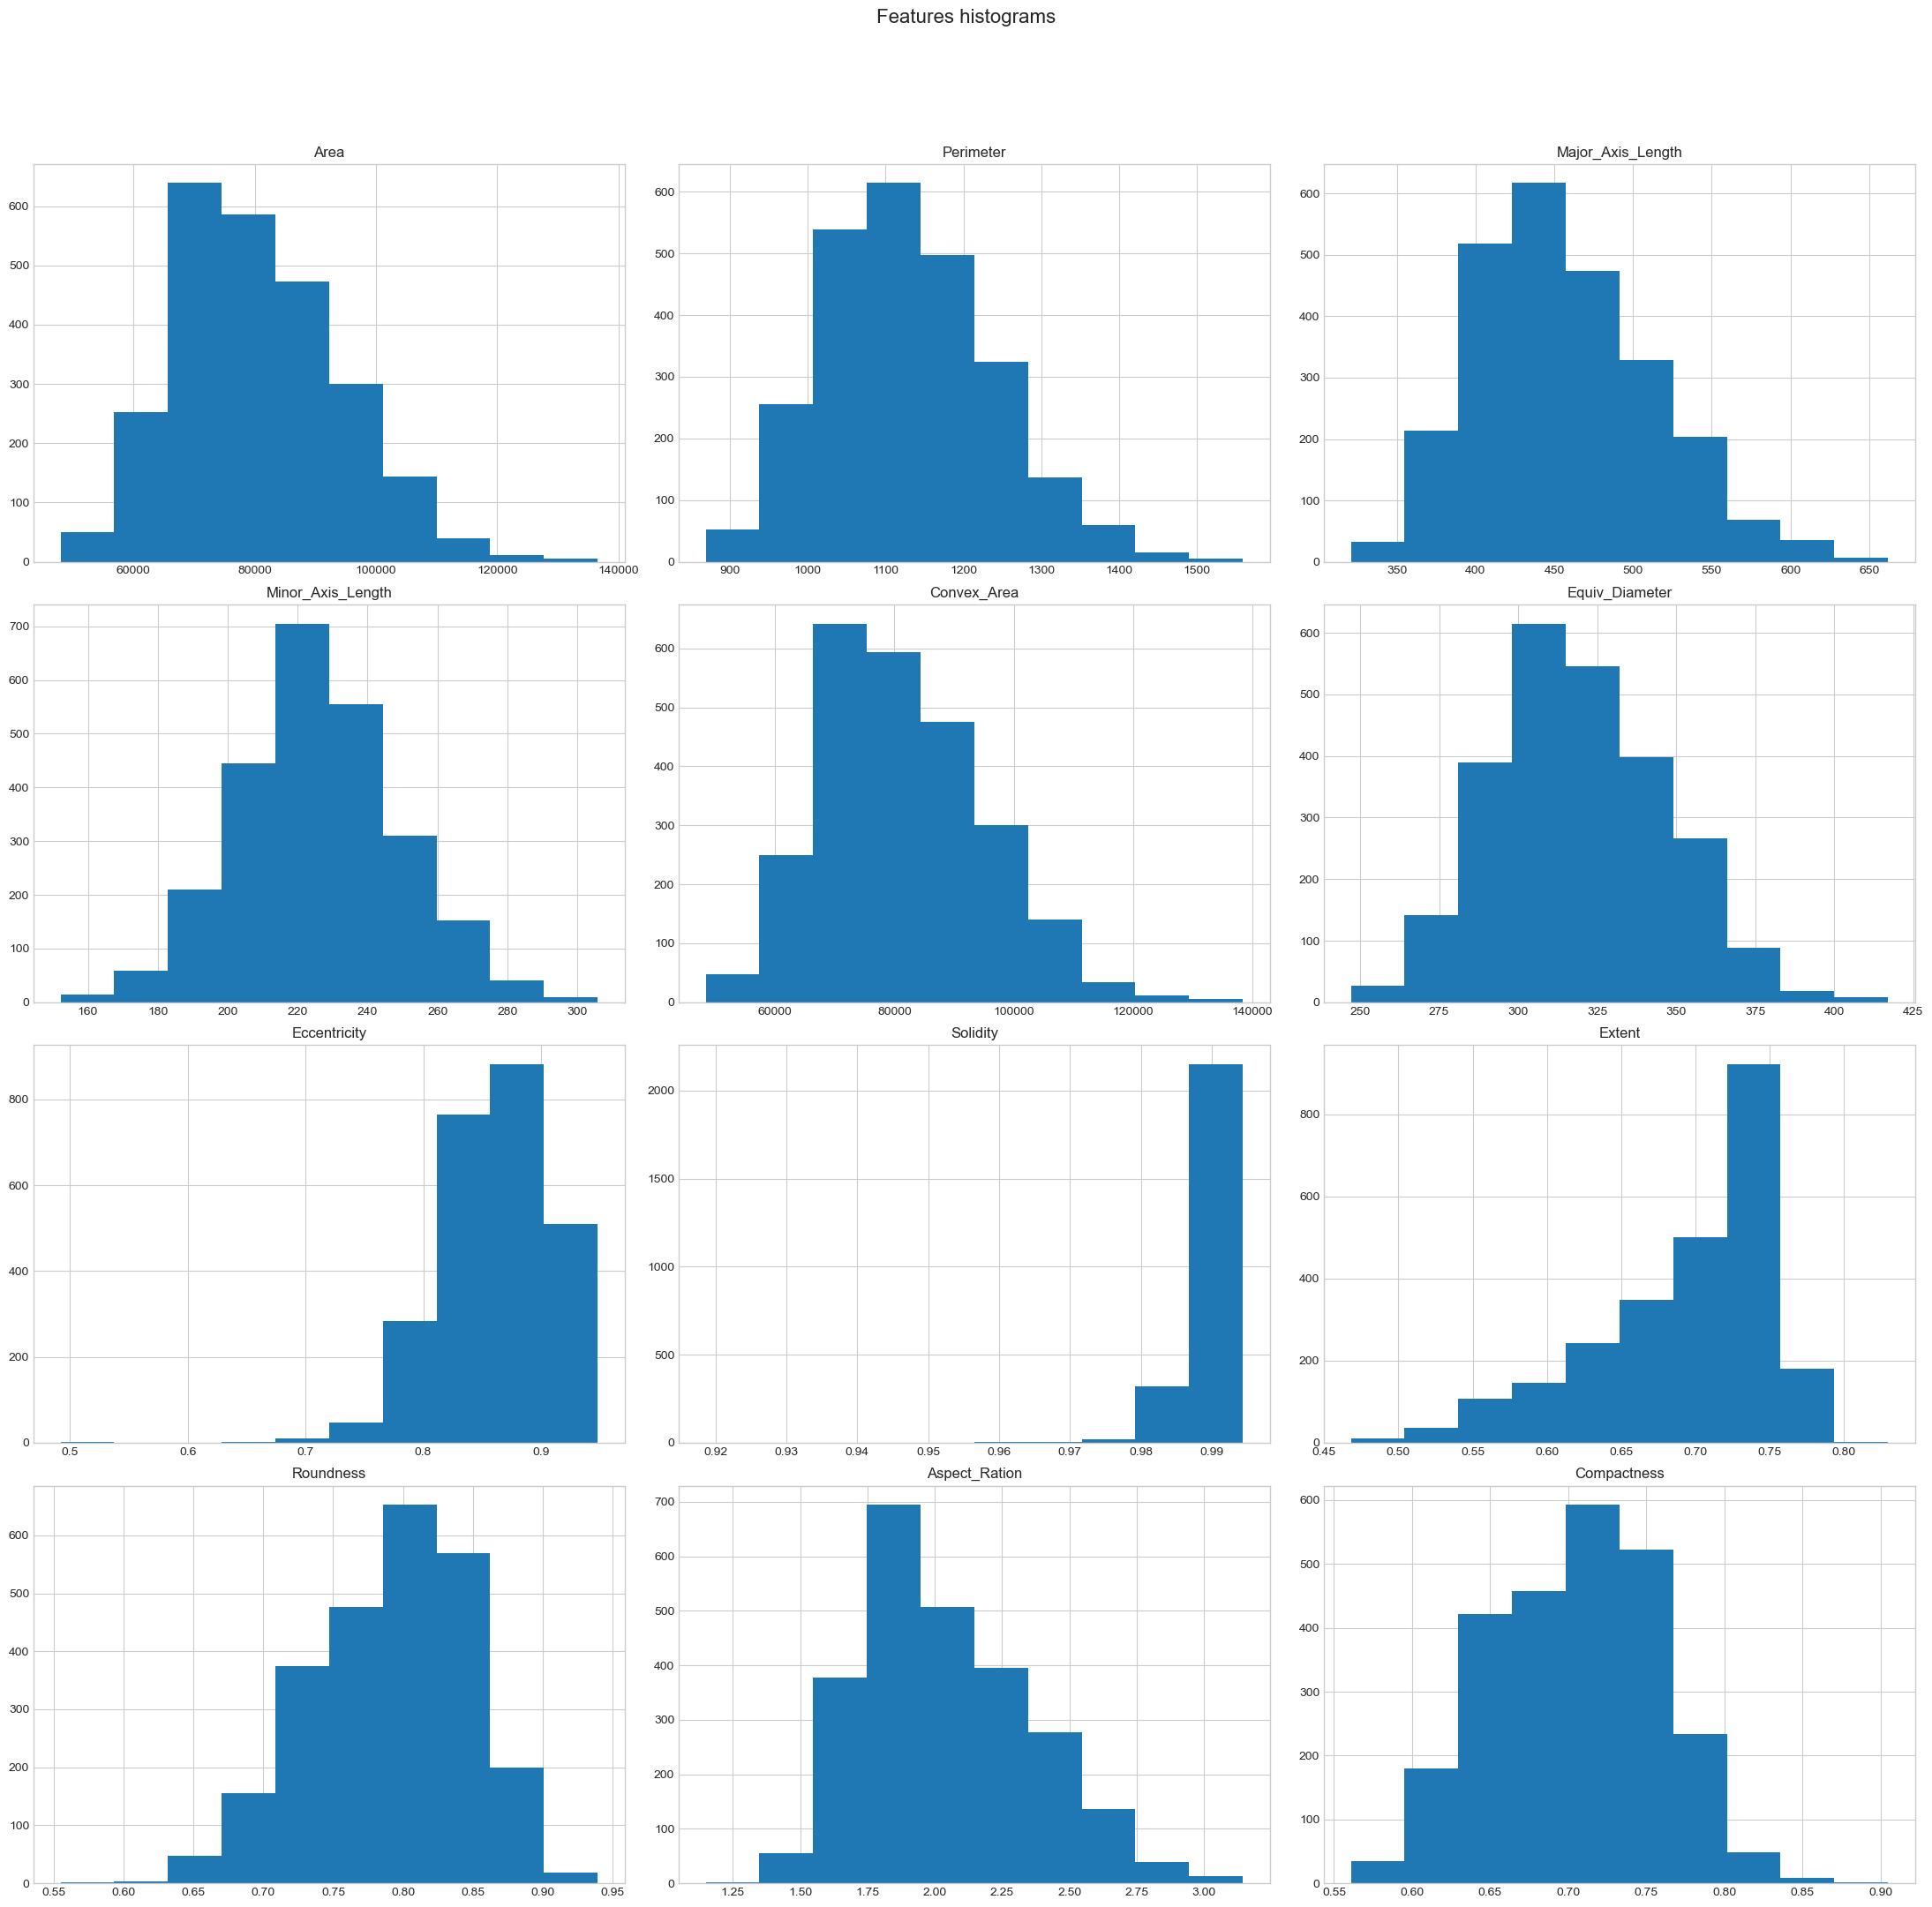

In [11]:
plot_hist(seed_data)

---
**<h4>Question 5:** Create a function to get the frequency distribution of the target variable in the dataset? </h4>

---

<details>

**<summary>Hint:</summary>**

- First we set the figure siz using `plt.figure(figsize=(22,5))`

- Then we use the countplot method in seaborn library and pass the target variable using the code `sns.countplot(x='Class',data=df)`.

- We will then add the title to the chart using `plt.title('Target')` and define labels for our xticks labels in the form of a list using `labels = ['Not Conflicting', 'Conflicting']`

- We then define the xticks and their labels with the help of `plt.xticks(ticks = [0,1], labels=labels)` and then lastly use the `plt.show()` to display the chart.

In [12]:
def countplot(df):
  plt.figure(figsize = (16,9))
  sns.countplot(x='Class',data=df)
  plt.title("Distribution of the Target Variable", fontsize=18)
  labels = ['Not Conflicting', 'Conflicting']
  plt.xticks(ticks = [0,1], labels=labels)
  plt.show()

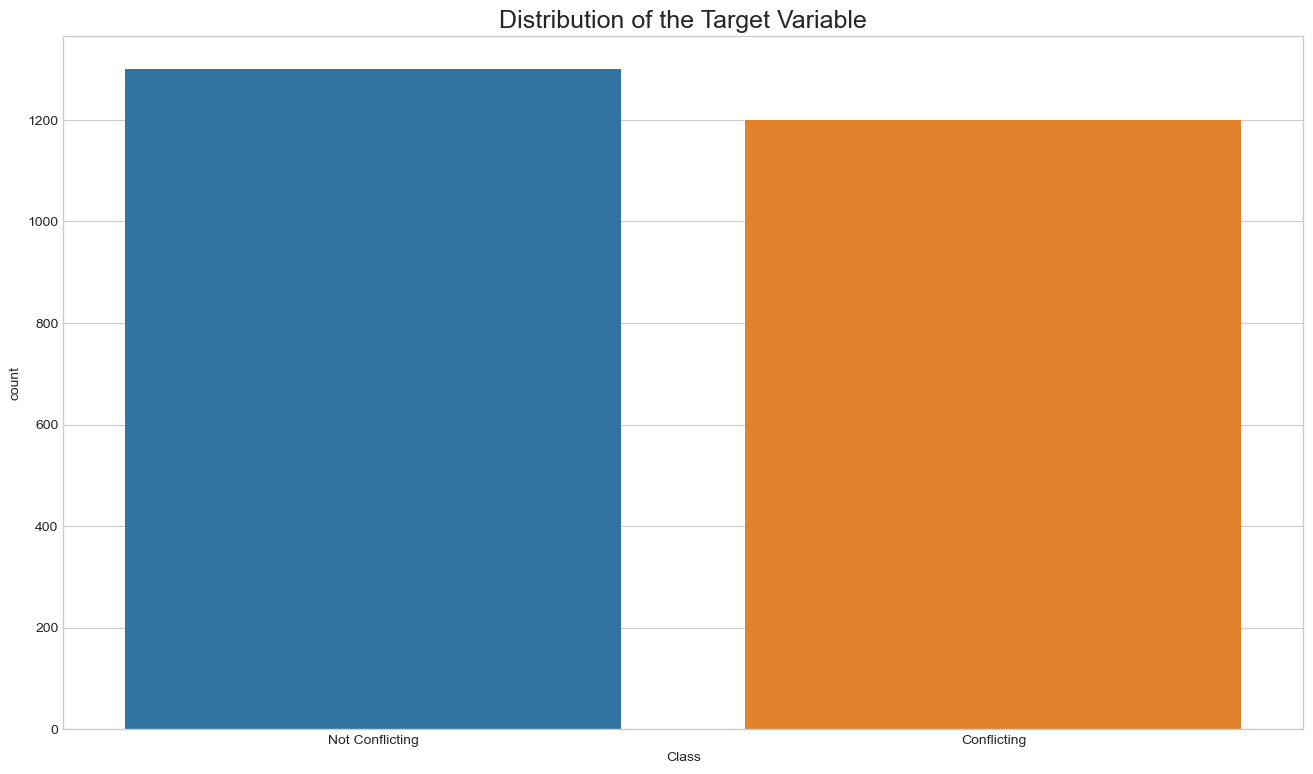

In [13]:
countplot(seed_data)

* The classes are almost equally distributed. This ensures that are model cannot be biased towards any class.

---
**<h4>Question 6:** How is the surface area of the seeds distributed?</h4>

---

<details>

**<summary>Hint:</summary>**
- Use `sns.histplot(data=df, x='Area', kde=True, hue='Class')`

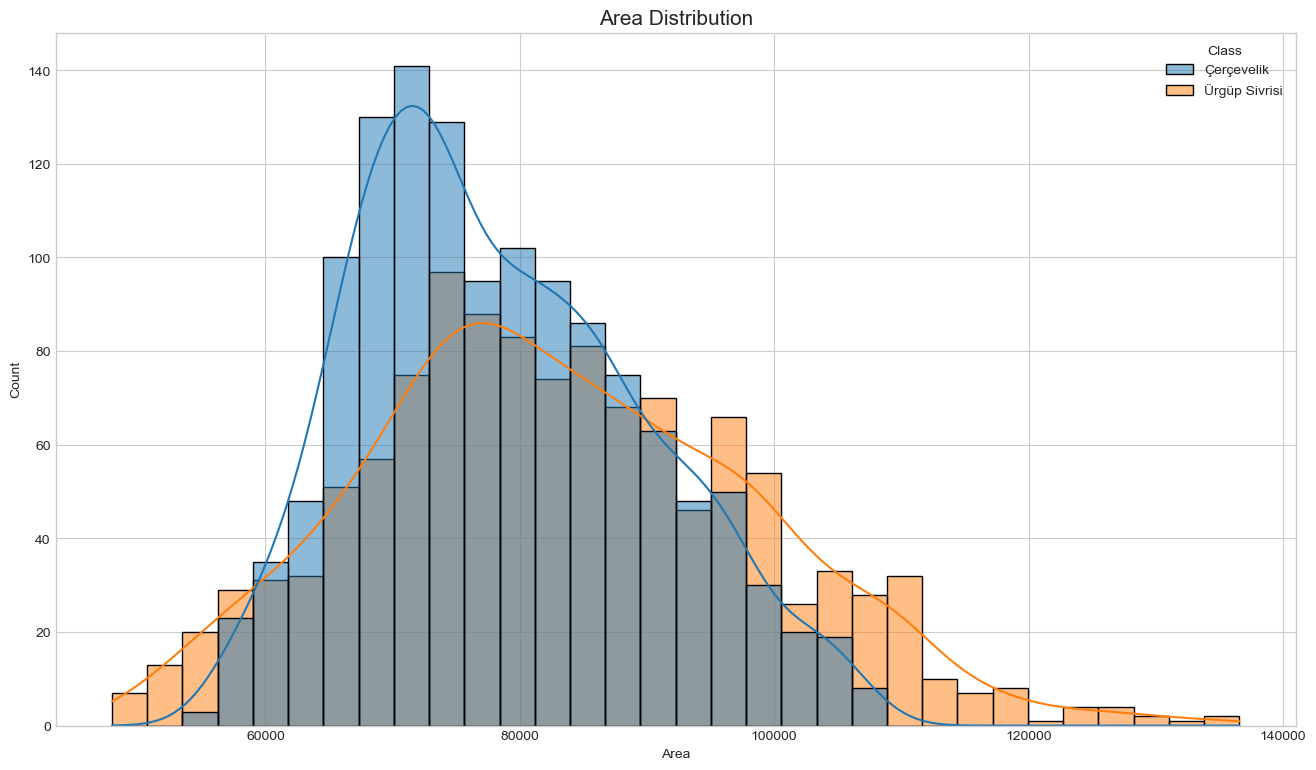

In [14]:
def area(df):
  plt.figure(figsize=(16,9))
  sns.histplot(data=df, x='Area', kde=True, hue='Class')
  plt.title("Area Distribution", fontsize=15)
  plt.show()

area(seed_data)

---
**<h4>Question 7:** How is eccentricity of seed distributed? </h4>

---

<details>

**<summary>Hint:</summary>**
- Use sns.histplot(data=df, x='Compactness', kde=True, hue='Class')

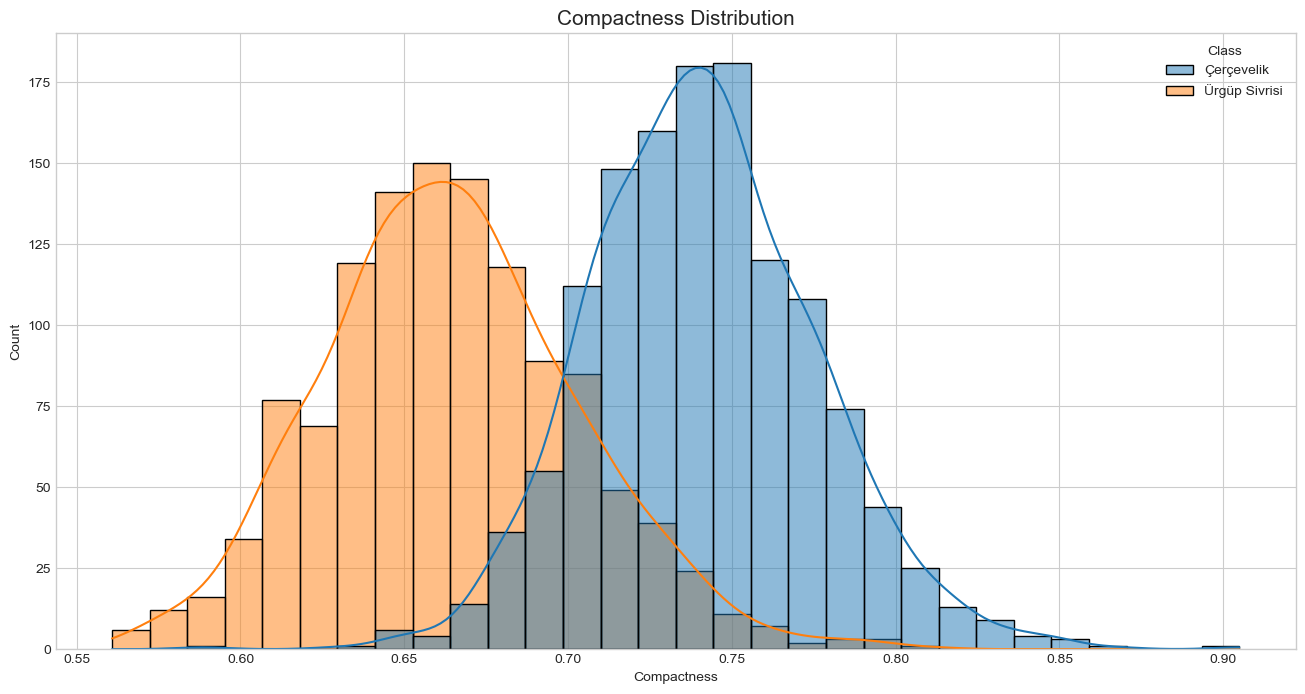

In [15]:
def compactness(df):
  plt.figure(figsize=(16,8))
  sns.histplot(data=df, x='Compactness', kde=True, hue='Class')
  plt.title("Compactness Distribution", fontsize=15)
  plt.show()

compactness(seed_data)

---
**<h4>Question 8:** How are all the features correlated to each other? How much are they correlated?</h4>

---

<details>

**<summary>Hint:</summary>**
- Create a correlation heatmap

- We create a subplot using the code `f, ax = plt.subplots(figsize=(10, 8))`

- Once done, we then call the heatmap function from the seaborn library and the pass the correlation dataframe using `df.corr()` and then get show the correlation on the heatmap with the help of annot argument using the code `sns.heatmap(df.corr(), annot=True)`

- Finally we display the figure using `plt.show()` method.

In [16]:
def heatmap(df):
  f, ax = plt.subplots(figsize=(12, 8))
  sns.heatmap(df.corr(), annot=True)
  plt.show()

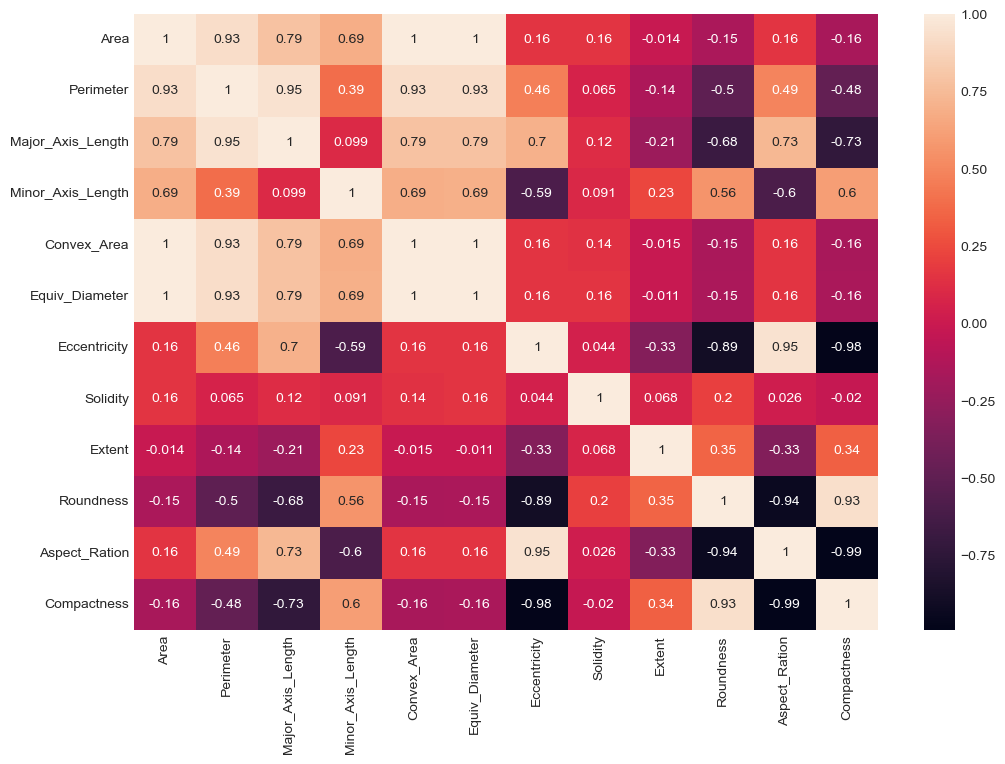

In [17]:
heatmap(seed_data)

* As `Convex_Area` , `Equiv_Diameter`and `Perimeter` are essentially the same as the *Area* and `Aspect_Ration` and `Roundness` are similar to the *Compactness* , we will drop these **highly correlated** features as they're not bringing any new information and increasing complexity.

---
**<h4>Question 9:** Drop the highly correlated features and plot the heatmap again. </h4>

---

<details>

**<summary>Hint:</summary>**

- First we define the figure size `plt.figure(figsize = (12, 8)`

- Then we drop all the highly correlated columns.
`df.drop(columns=['Convex_Area', 'Equiv_Diameter', 'Perimeter', 'Aspect_Ration','Roundness'], axis=1, inplace=True)`

- Finally we display the heatmap using the above function `heatmap()`

In [18]:
def final_heatmap(df):
  df.drop(columns=['Convex_Area', 'Equiv_Diameter', 'Perimeter', 'Aspect_Ration', 'Roundness' ], axis=1, inplace=True)
  heatmap(df)

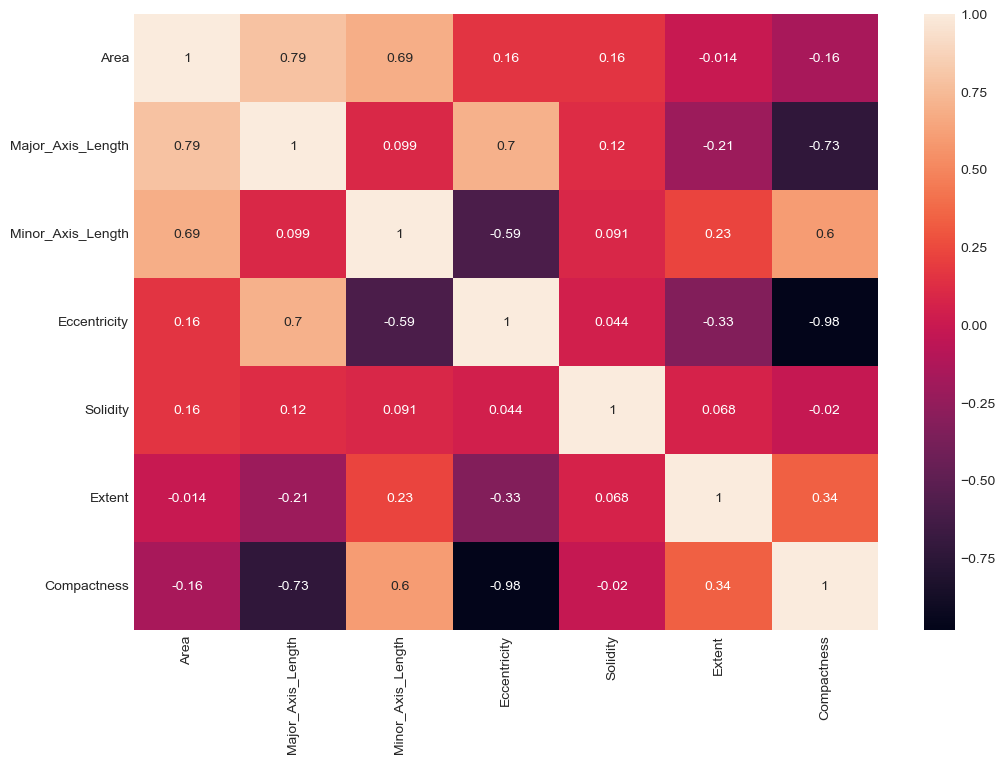

In [19]:
final_heatmap(seed_data)

---
**<h4>Question 10:** Create a pairplot to understand the relationships between the data clearly </h4>

---

<details>

**<summary>Hint:</summary>**

- For plotting a pairplot use :
`sns.pairplot(df)`

```

</details>

In [33]:
def pairplot(df):
  sns.pairplot(df, hue='Class')

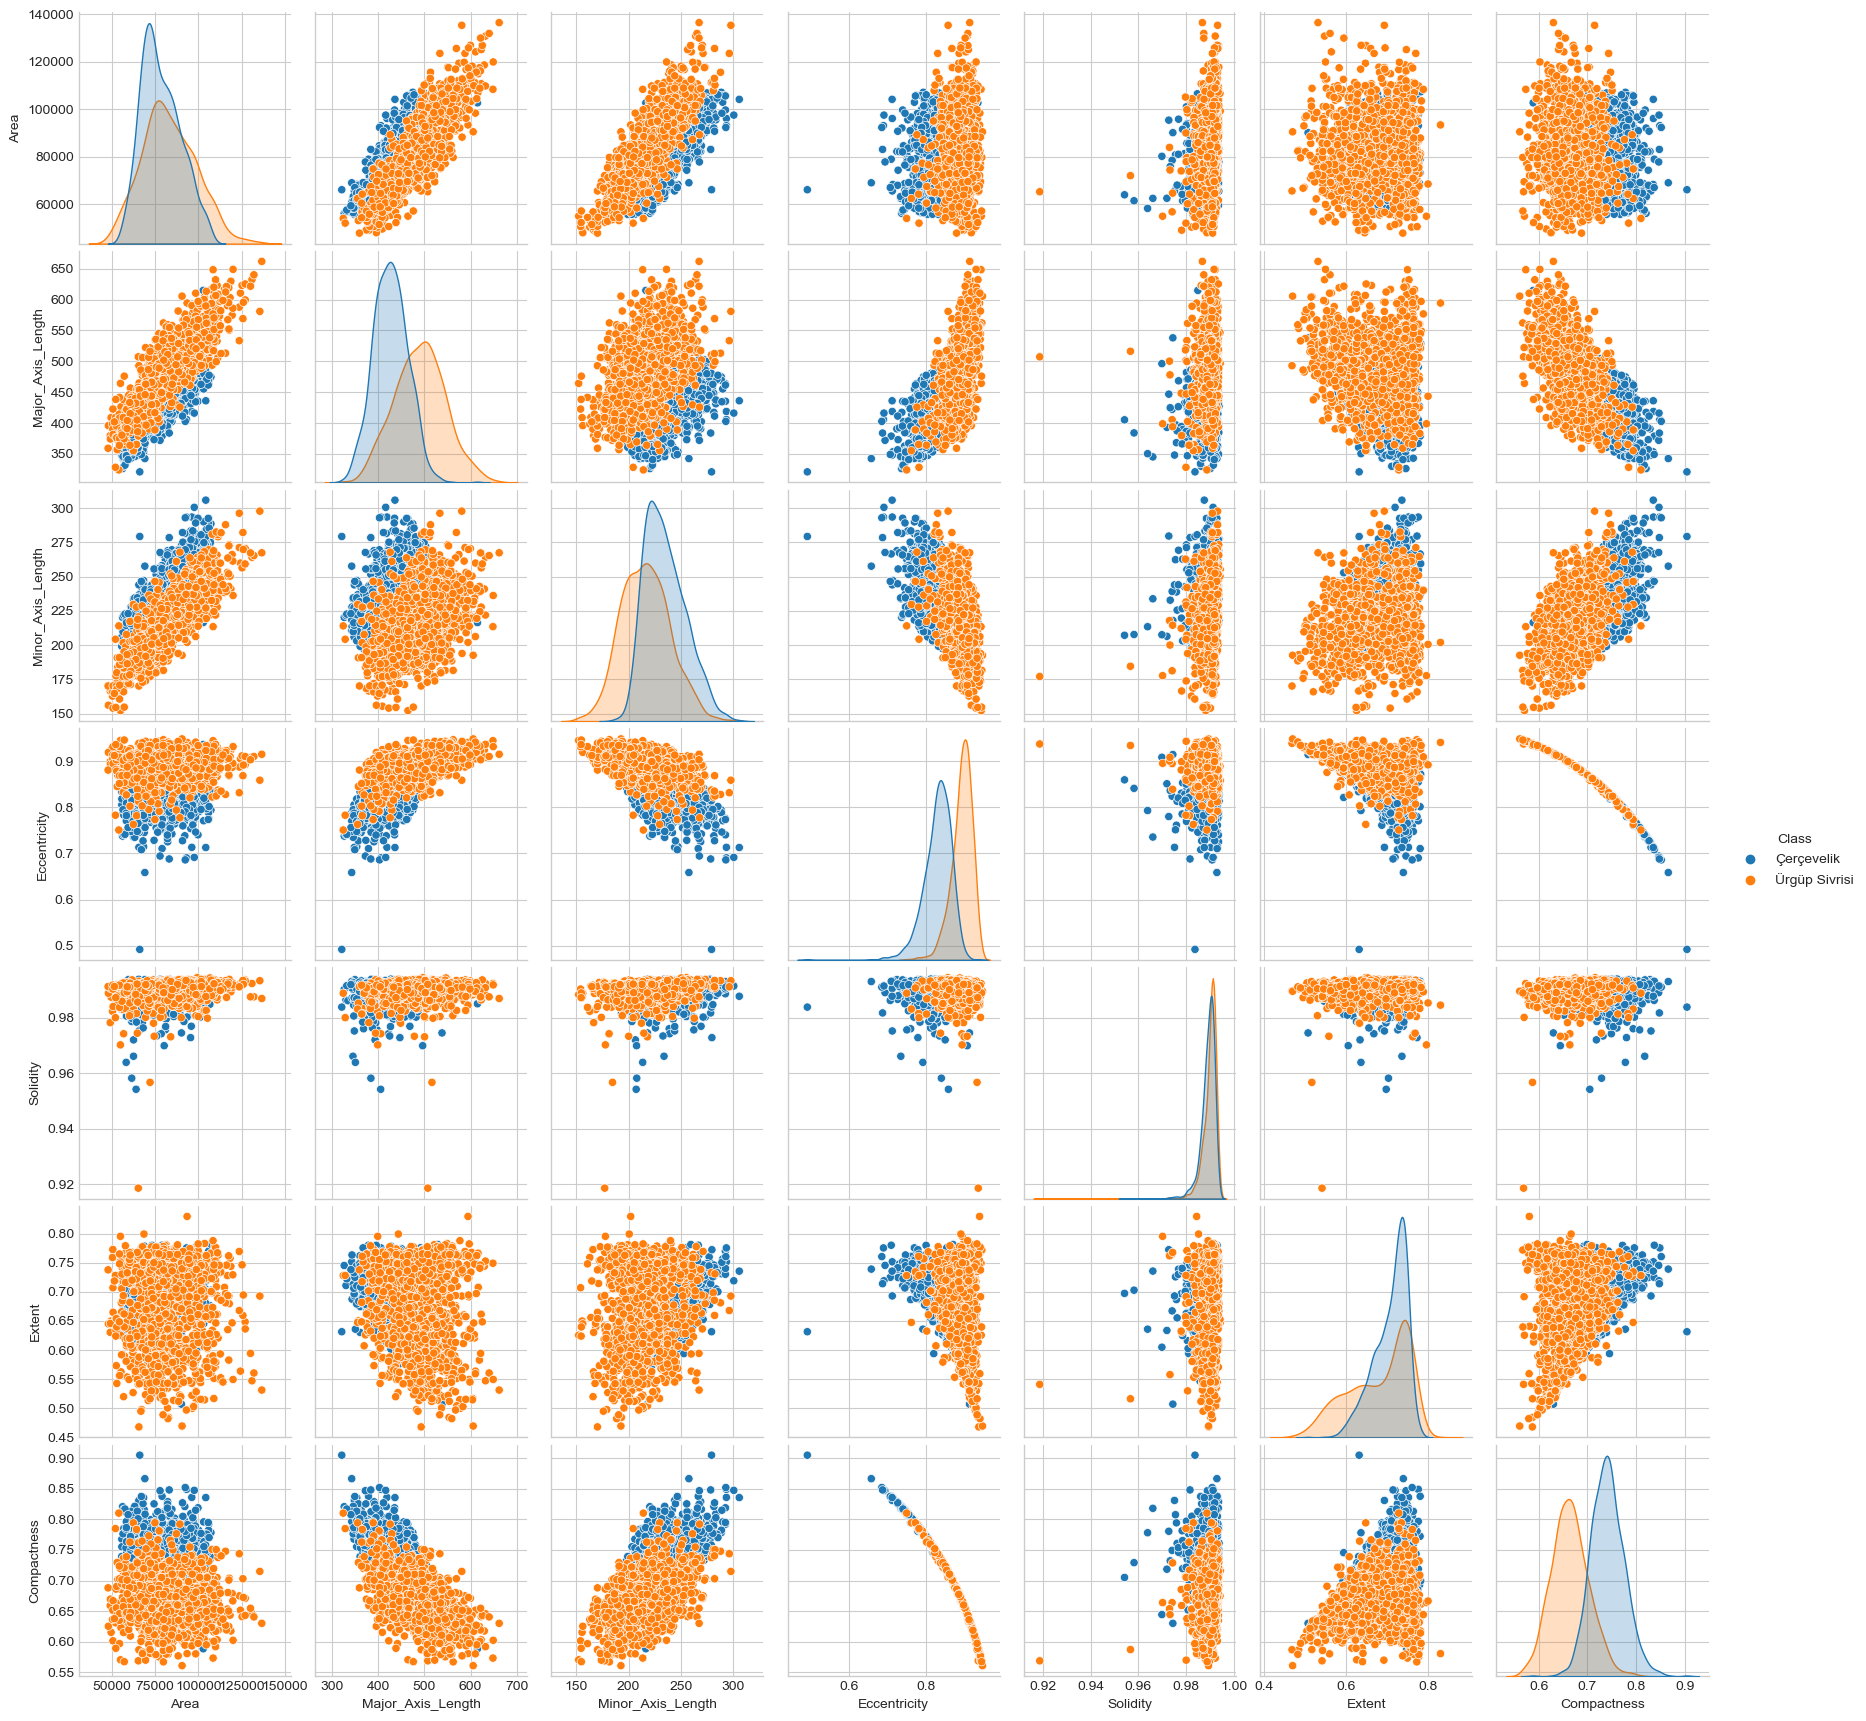

In [34]:
pairplot(seed_data)

<a id = Section7></a>

---
# **7. Post Data Processing**
---

- We will **split** our **data** for the **model development**.

---
**<h4>Question 11:**  Encoding the categorical data, which is the target variable</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `LabelEncoder()` to do that
- First instantiate the function and then fit_transform to the target variable



```
le= LabelEncoder(df['Class'])
df['Class']=le.fit_transform(col)
```



In [35]:
def encode(df):
  le = LabelEncoder()
  df['Class'] = le.fit_transform(df['Class'])

encode(seed_data)

In [36]:
seed_data.head()

,Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Compactness,Class
0,56276,326.1485,220.2388,0.7376,0.9902,0.7453,0.8207,0
1,76631,417.1932,234.2289,0.8275,0.9916,0.7151,0.7487,0
2,71623,435.8328,211.0457,0.8749,0.9857,0.7400,0.6929,0
3,66458,381.5638,222.5322,0.8123,0.9902,0.7396,0.7624,0
4,66107,383.8883,220.4545,0.8187,0.9850,0.6752,0.7557,0


---
**<h4>Question 12:**  Shuffling the data as it is sorted by the target variable class</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `df.sample(frac=1)`

- After shuffling, reset the index and drop the previous one-

`df= df.reset_index(drop=True)`

In [37]:
def shuffle(df):
  df= df.sample(frac=1).reset_index(drop=True)
  return df.head()

shuffle(seed_data)

,Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Compactness,Class
0,81479,555.6465,189.8791,0.9398,0.9869,0.7438,0.5797,1
1,74091,421.2427,225.9795,0.8439,0.9862,0.6373,0.7291,0
2,87599,448.2531,249.5575,0.8307,0.9903,0.7433,0.7450,0
3,55552,402.1519,176.3931,0.8987,0.9891,0.6813,0.6613,1
4,92851,458.9213,260.6300,0.8231,0.9860,0.7629,0.7492,0


---
**<h4>Question 13:**  Create a function to split the data into test and train sets using a  20% to 80% split and a random_state of 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- Extract all the predictor features from the dataset by using:
`X = df.drop(['Class'], axis=1)`

- Extract the target feature from the dataset by using:
`y = df['Class']`

- Use sklearn library's train_test_split function to split the dataset into train and test set by keeping 20% of the data for testing. You can do that by using:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`

</details>

In [38]:
#splitting data into training and test sets
def split_data(df, test_size=0.2, random_state=42):
  X = df.drop(["Class"], axis = 1)
  y = df["Class"]
  xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size, random_state=random_state)
  return xtrain, xtest, ytrain, ytest

In [39]:
X_train, X_test, y_train, y_test = split_data(seed_data, test_size=0.2, random_state=42)

In [40]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (2000, 7) (2000,)
Testing Data Shape: (500, 7) (500,)


<a id = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop different models**.
- Then we will **compare the results** obtained from them and make our observations.
- For **evaluation purpose** we will plot **precision and recall** for **each estimator** for which a **custom function** is made below .
- We also use **confusion matrix** for **validation** purpose.
- **Remember** that **we want generalize results** i.e. same results or error in testing data as that of training data.
- **At the end** we will **tune** our **models if required**.

<a id = Section83></a>
### **Logistic Regression Classifier**

**<h4>Question 14:** Create a function that instantiates a Logistic Regression Classifier Model with Default Parameters.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate using `lr = LogisticRegression()` and return the same in the function


</details>

In [41]:
def instantiate_lr_model():
  lr = LogisticRegression()
  return lr

In [42]:
lr = instantiate_lr_model()

---
**<h4>Question 15:** Fit the logistic model on X_train and y_train</h4>

---

<details>

**<summary>Hint:</summary>**
- `Fit` the model on training set using `lr.fit(X_train, y_train)`
</details>

In [43]:
def fit_lr_model(model, X_train, y_train):
  model.fit(X_train, y_train)

In [44]:
fit_lr_model(lr, X_train, y_train)

---
**<h4>Question 16:** Use the model for prediction on training and test data</h4>

---

<details>

**<summary>Hint:</summary>**

- Use:

`y_pred_train= lr.predict(X_train)`

`y_pred_test= lr.predict(X_test)`



In [45]:
y_pred_train = pd.DataFrame()
def train_pred():
    y_pred_train= lr.predict(X_train)
    return y_pred_train

y_pred_train = train_pred()

In [46]:
y_pred_test = pd.DataFrame()
def test_pred():
    y_pred_test= lr.predict(X_test)
    return y_pred_test

y_pred_test = test_pred()

---
**<h4>Question 17:** Evaluate the model using accuracy score and classification report</h4>

---

<Details>

**<summary>Hint:</summary>**
- Calculate the accuracy of the model-

`accuracy= accuracy_score(y_test, y_pred_test)`

- Create the Classification for both sets report using:

```
lr_report_train = classification_report(y_train, y_pred_train)
lr_report_test = classification_report(y_test, y_pred_test)

```

- Finally Print the Classification Reports:

```
print ('Accuracy =', accuracy*100,'%')
print('                    Training Report          ')
print(lr_report_train)
print('                    Testing Report           ')
print(lr_report_test)

```


In [47]:
def evaluate_lr_model():
  accuracy = accuracy_score(y_test, y_pred_test)
  lr_report_train = classification_report(y_train, y_pred_train)
  lr_report_test = classification_report(y_test, y_pred_test)

  print ('Accuracy =', accuracy*100, '%')
  print('                        Training Report')
  print(lr_report_train)
  print('                        Testing Report')
  print(lr_report_test)

evaluate_lr_model()

Accuracy = 82.6 %
                        Training Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1049
           1       0.89      0.85      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

                        Testing Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       251
           1       0.84      0.80      0.82       249

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



---
<a id = Section8></a>

# **8. Conclusion**
---
**Observations:**

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **investigated about the features** which to **retain** and which to **discard**.

- We **performed model development**

- We **evaluated our model** calculate the **accuracy_score** and **classification report** and were able to obtain **82.6%** accuracy